

  0%|          | 0/25 [00:00<?, ?it/s]

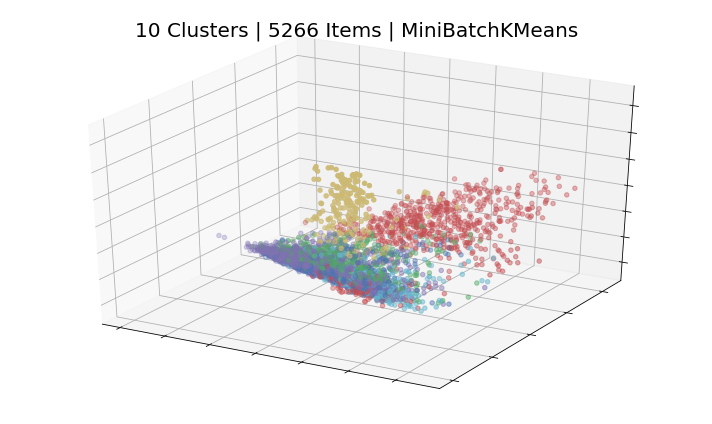



  4%|▍         | 1/25 [00:02<01:01,  2.57s/it]

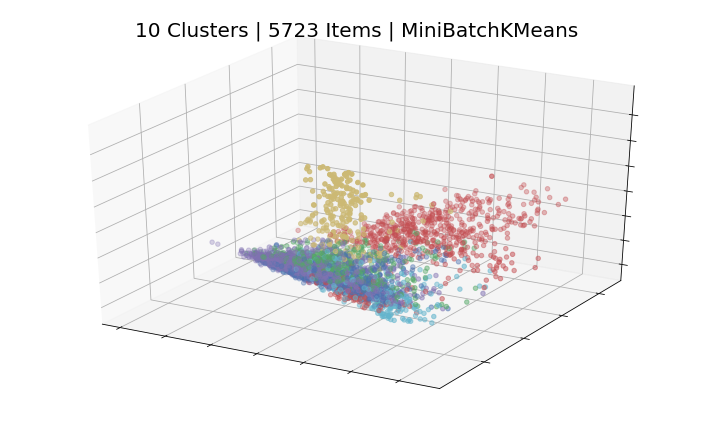



  8%|▊         | 2/25 [00:05<00:57,  2.52s/it]

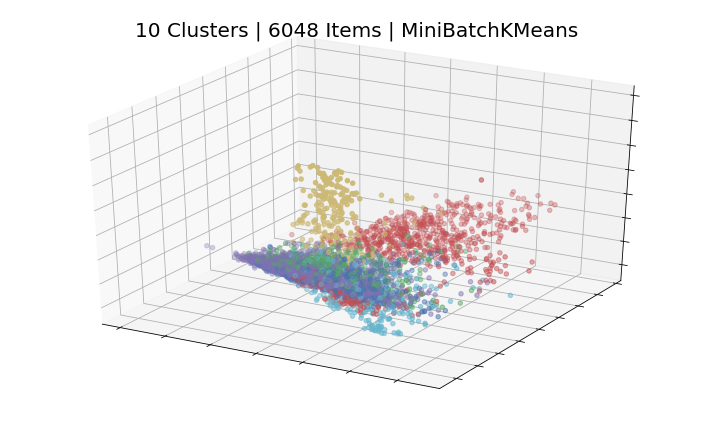



 12%|█▏        | 3/25 [00:07<00:54,  2.47s/it]

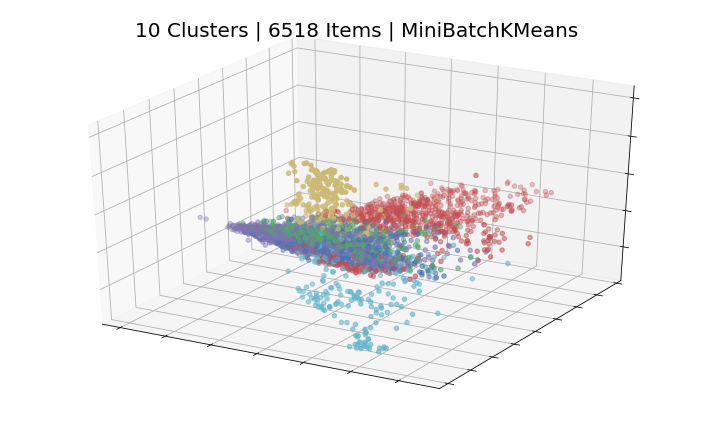



 16%|█▌        | 4/25 [00:09<00:51,  2.47s/it]

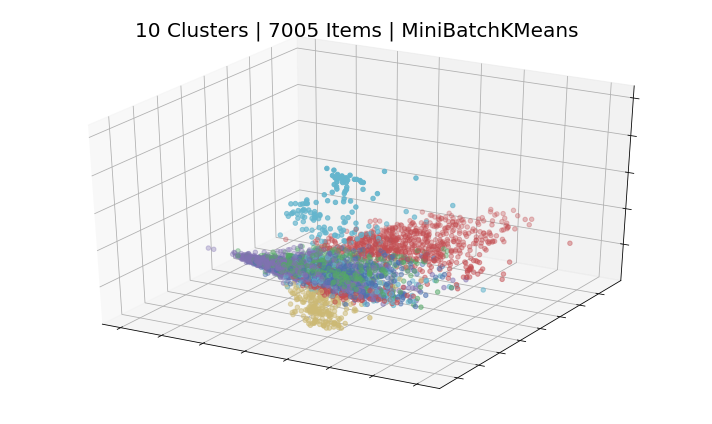



 20%|██        | 5/25 [00:12<00:50,  2.52s/it]

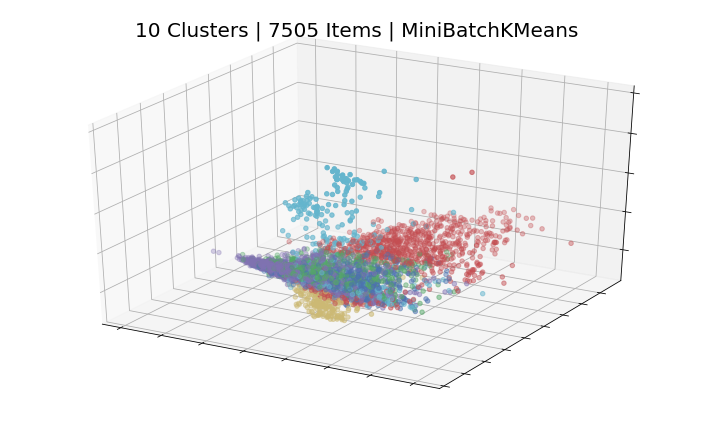



 24%|██▍       | 6/25 [00:15<00:48,  2.57s/it]

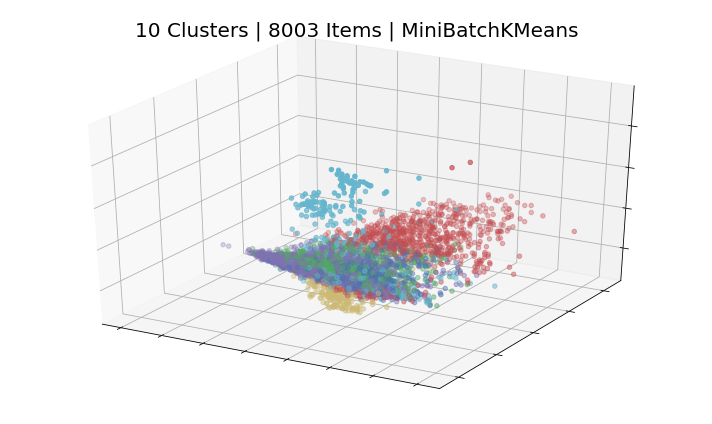



 28%|██▊       | 7/25 [00:18<00:46,  2.61s/it]

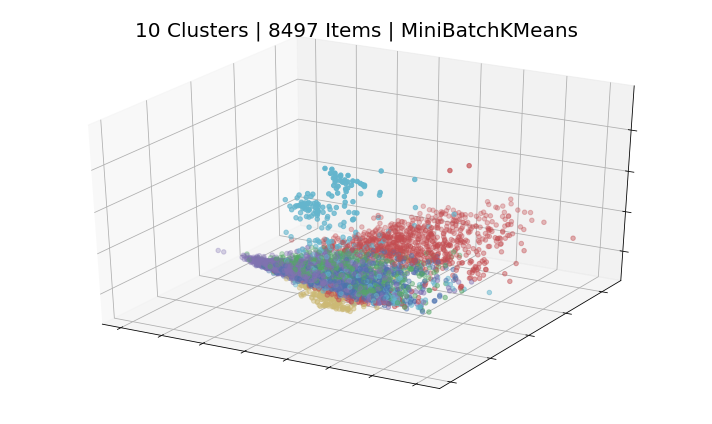



 32%|███▏      | 8/25 [00:21<00:44,  2.64s/it]

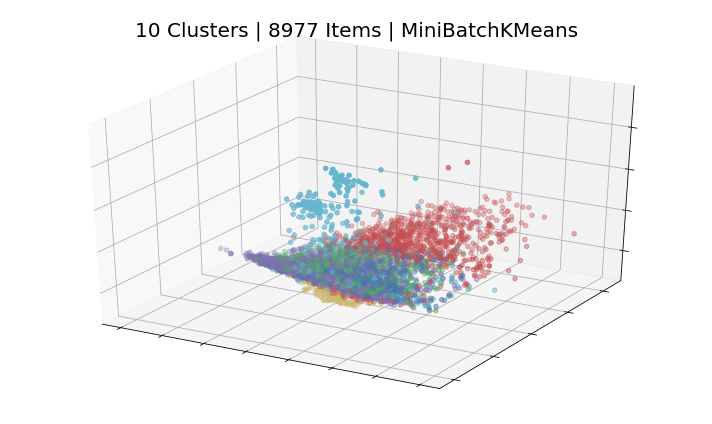



 36%|███▌      | 9/25 [00:24<00:42,  2.67s/it]

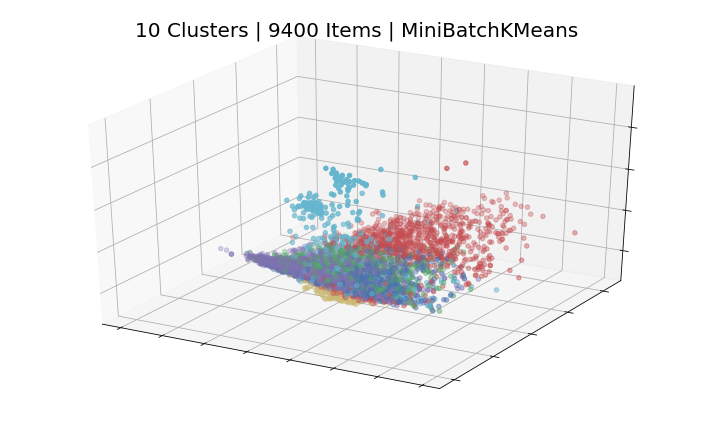



 40%|████      | 10/25 [00:26<00:40,  2.69s/it]

StopIteration: 

In [3]:
import os, sys
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)

from src.clustering import OnlineCluster
from src.modules import StreamData
from datetime import datetime
from tqdm import tqdm

%matplotlib inline


# Initialize streamer, cluster (this is the data that will be used to create TFIDF matrix)
streamer = StreamData(filename='../data/talk_radio.csv', chunk=500, use_column='sentences')
init_text = streamer._init_data(10)
online = OnlineCluster(text=list(init_text.processed), method='kmeans', n_clusters=10)

num_batches = 25

for _ in tqdm(range(num_batches)):
    
    # Get new batch
    new_text = streamer()
    
    # Predict
    labels = online.predict(list(new_text.processed))
    
    # Plot
    fig = online.viz3D()
    
    # Optional save figure
    # fig.savefig('../data/out-%s.png' % (str(datetime.now()).split(' ')[1]))

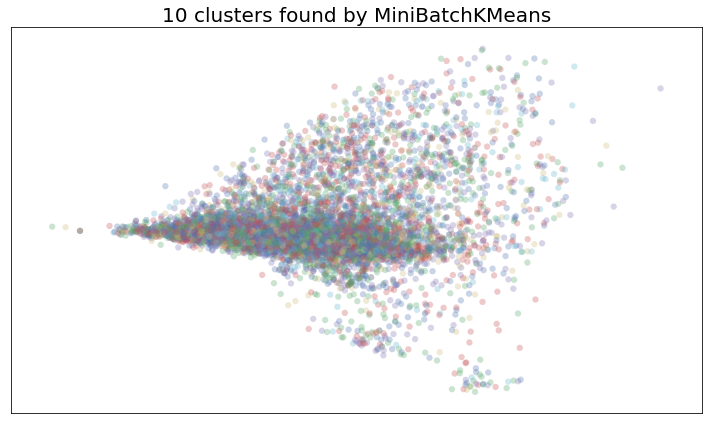

In [4]:
# Not super informative in 2D
_ = online.viz2D()

In [5]:
_ = online.top_terms()

Top terms per cluster:
Cluster 0 (670 items): fbi | investigation | clinton | attorney | michael | lawyer | interview | abc | federal | hillary
Cluster 1 (806 items): boston | npr | marathon | org | phoenix | tomorrow | degrees | station | supported | rain
Cluster 2 (282 items): factor | pain | mobile | patriot | credit | blind | prescription | relief | debt | conservative
Cluster 3 (3002 items): went | city | police | away | let | place | came | story | person | started
Cluster 4 (218 items): retirement | financial | market | income | stock | safe | plan | portfolio | mayfield | risk
Cluster 5 (809 items): zero | estate | real | pools | gmc | tax | market | pool | mortgage | tucson
Cluster 6 (1214 items): thought | guy | let | kids | story | love | started | went | children | coast
Cluster 7 (1084 items): china | government | political | countries | question | governor | republican | party | media | republicans
Cluster 8 (837 items): chemical | weapons | syria | russia | strikes | att

In [8]:
online.results[0][:10]

['retire retired financial peace mind jeff primary retirement plan management generic shelves plans implement accustomed comprehensive retirement strategy based important complimentary financial review online retirement social security planning management football found line eighteen sanctions announced soon treasury secretary un ll aimed companies dealing equipment connected present chemical weapons everyone fail everyone else strong face nation springtime winter storm splitting foot snow making rose eastern planes lakes utilities report power outages justice michigan avenue abc washington post trumps approval rating higher january historically low presidents term abc george stephanopoulos though taking fact economy strong warning sign white court hearing regarding fbi raised office personal lawyer washington crucial hearing michael cohen anyhow garnering attention throwing possible storming daniel parents suspense irritated wasn court friday wanted tomorrow answer questions client ma